# Image Type Classification

This program classifies images that are expected in the database into 3 main categories - Medical Images, Medical Documents and Clinical Photographs
<br>
<br>
The list of expected file attachments in the data universe is:
<br>
<br>
<br>
**1. Medical Images** <br>

     1.1. X Rays
     1.2. CT Scan Brain (Only Brain is good enough to start with as it will form the major part of CT Image universe)
     1.3. MRI Spine (Only 'Spine' is good enough to start with as it will form major part of MRI Image Universe)
     1.4. Angiogram showing Blockages / Stents.
     

**2. Medical Documents** (Printed, Handwritten or a combination of both -all three to be clubbed together)<br>

    2.1. Clinical Notes
    2.2. Lab Reports
    2.3. X Ray Reports
    2.4. Ultrasound Examination Reports
    2.5. CT Scan Reports
    2.6. MRI Scan Reports
    2.7. Angiography/Angioplasty Reports
    2.8. Echocardiography Reports
    2.9. Implant / Device Invoice
    2.10. Implant / Device Bar Code Stickers
    2.11. Discharge Notes
    
    
**3. Clinical Photographs**<br>

    3.1. Injury photos
    3.2. Burn Photos
    3.3. Intra operative Photographs
    


## Importing Packages

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import random
import tensorflow as tf

In [ ]:
print("Numpy Version \t\t", np.__version__)
# print("Matplotlib Version\t", matplotlib.__version__)
print("OpenCV Version \t\t", cv2.__version__)
print("TensorFlow Version \t", tf.__version__)

Numpy Version 		 1.19.5
OpenCV Version 		 4.1.2
TensorFlow Version 	 2.7.0


## Retrieve Data

In [ ]:
# Location of sample data
path = './samples/from google'
print(os.listdir(path))

# These correspond to the sample data directory structure
categories = ['clinical photos', 'medical documents', 'medical images']
print(categories)

In [ ]:
# Which image file types to import
image_types = ['.png', '.jpg', '.jpeg']

### Directory Crawler
This reccursive function crawls through a given directory and outputs an exhaustive list of files (at the end of each directory branch) of specified filetypes. Can be modified to apply any function over the files.
<br>
<br>

In [ ]:
# Directory Path (String), FileType (List), Dataset (List) -> Files (List)
def dir_crawler(directory, filetype, function=None, dataset=[]):

    # Iterate over each item in directory
    for item in os.listdir(directory):

        newpath = os.path.join(directory, item)

        # If Directory, Recurse function
        if os.path.isdir(newpath):
            # Add files outputted from nested function to the main dataset
            dataset += dir_crawler(newpath, filetype, function, dataset)

        # If File, append file to dataset
        elif os.path.isfile(newpath):
            if True in [(atype in item) for atype in filetype]:
                dataset.append(cv2.cvtColor(cv2.imread(newpath, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
#                 print(newpath)
#                 dataset.append(function(newpath))


    return dataset

In [ ]:
# testpath='./dircrawler test'
# print(os.listdir(testpath))
# dir_crawler(testpath, ['.txt'], pd.read_csv, [])

### Sample Data
As of now, Medical Images, Medical Documents and Clincial Photographs will be imported separately for the purposes of labeling.

#### Importing Medical Images

In [ ]:
# Path to Medical Images
path_medical_images = os.path.join(path, 'medical images')
# os.listdir(path_medical_images)

# Dataset of Medical Images
medical_images = []

# Crawl through Path to Medical Images
for thing in tqdm(os.listdir(path_medical_images)):

    newpath = os.path.join(path_medical_images, thing)

    # Extract all the files at the end of the directories
    medical_images += dir_crawler(directory=newpath, filetype=image_types, dataset=[])

print('Medical Images: ', len(medical_images))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:23<00:00,  7.69s/it]

Medical Images:  2376


#### Medical Documents

In [ ]:
# Path to Medical Docs
# os.listdir(path)
path_medical_docs = os.path.join(path, 'medical documents')

# Datset of Medical Documents
medical_docs = []

for thing in tqdm(os.listdir(path_medical_docs)):

    newpath = os.path.join(path_medical_docs, thing)

    if os.path.isdir(newpath):
        medical_docs += dir_crawler(directory=newpath, filetype=image_types, dataset=[])

print("Medical Docs", len(medical_docs))

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.70s/it]

Medical Docs 2135


#### Clinical Photos

In [ ]:
# Path to Clinical Photos
os.listdir(path)
path_clincial_photos = os.path.join(path, 'clinical photos')

clincal_photos = []

clincal_photos += dir_crawler(directory=path_clincial_photos, filetype=image_types, dataset=[])

print('Clincal Photos:', len(clincal_photos))


Clincal Photos: 1080


#### Merging all Classes
Images will be labeled. Since each of the datasets for the sample categories was procured separately, the number of images per class will be balanced out and the data will be shuffled to reduce chances of model classification bias.

In [ ]:
# Check Sizes
print('Medical Images:\t', len(medical_images))
print('Medical Docs:\t', len(medical_docs))
print('Clincal Photos:\t', len(clincal_photos))

Medical Images:	 2376
Medical Docs:	 2135
Clincal Photos:	 1080


Shuffling Data

Note to user: Image samples might not display perfectly in this scenario


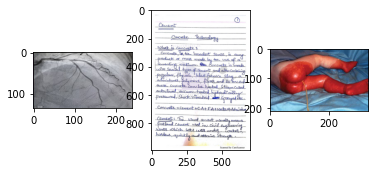

Data Shuffled


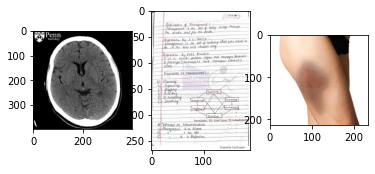

In [ ]:
print('Note to user: Image samples might not display perfectly in this scenario')
# Previewing data Before and After Shuffling
for index, item in enumerate([medical_images[0], medical_docs[0], clincal_photos[0]]):
    plt.subplot(1, 3, index+1)
    plt.imshow(item)

plt.show()

print('Data Shuffled')
random.shuffle(medical_images)
random.shuffle(medical_docs)
random.shuffle(clincal_photos)

for index, item in enumerate([medical_images[0], medical_docs[0], clincal_photos[0]]):
    plt.subplot(1, 3, index+1)
    plt.imshow(item)

Balancing out the image class ratios to prevent model bias

In [ ]:
# Gather Data
datasets = [medical_images, medical_docs, clincal_photos]

least_size = min([len(x) for x in datasets])
print('Smallest Class Sample Size:\t', least_size)

train_data = []

for aset in datasets:
    for index, item in enumerate(aset):
        if index <= least_size:
            train_data.append((item, datasets.index(aset)))

# for aset in datasets:
#     train_data += aset[:least_size]

print('Size of train_data:\t\t', len(train_data))

Smallest Class Sample Size: 1080
Size of train_data: 3242


## Prepare Data

In [ ]:
# Function to take in training data, shuffle it and output images and labels prepared for training with Keras
# train_data -> x, y
def prepare_data(dataset=train_data, image_size=128, n_classes=3):

    # Shuffle the full training data
    random.shuffle(dataset)

    # Initialise x and y as lists for image input and label
    x = []
    y = []

    # Resize images and Split data into x and y
    for img, label in tqdm(dataset):
        img_transformed = cv2.resize(img, (image_size, image_size), interpolation = cv2.INTER_CUBIC)
        x.append(img_transformed)
        y.append(label)


    # Convert to numpy array and float32
    x = np.array(x).reshape(-1, 128, 128, 3)
    y = np.array(y)

    x = x/255.0
    y = tf.keras.utils.to_categorical(y,  num_classes=n_classes, dtype='float32')

    print('x:', type(x), x.shape)
    print('y:', type(y), y.shape)

    return x, y

In [ ]:
x, y = prepare_data(train_data)

100%|████████████████████████████████████████████████████████████████████████████| 3242/3242 [00:00<00:00, 3487.84it/s]


x: <class 'numpy.ndarray'> (3242, 128, 128, 3)
y: <class 'numpy.ndarray'> (3242, 3)


## Model Construction

In [ ]:
# Import the NN components
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
# Function to construct model
def create_model_v1_generic(num_classes=3, image_size=128):

    # Layers
    model = tf.keras.models.Sequential()

    model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(image_size, image_size, 3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(Conv2D(64, kernel_size=3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(Flatten())

    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Summary
    print(model.summary())

    return model

In [ ]:
def create_model_v2_generic(num_classes=3):

    # Layers
    model = tf.keras.models.Sequential()

    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128,128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(128,128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

    model.add(Flatten())

    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())

    return model


## Model Training

In [ ]:
# Run specified model with Preset Config, Early Stopping and Diagnostics
def run_model(model_function, batch_size=64):

    # Using callbacks to enable Early Stopping
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

    # Construct model1
    model = model_function()
    history = model.fit(x, y, batch_size=batch_size, epochs=25, validation_split=0.2, callbacks=[es_callback])

    return model, history

    # Diagnostics
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)             

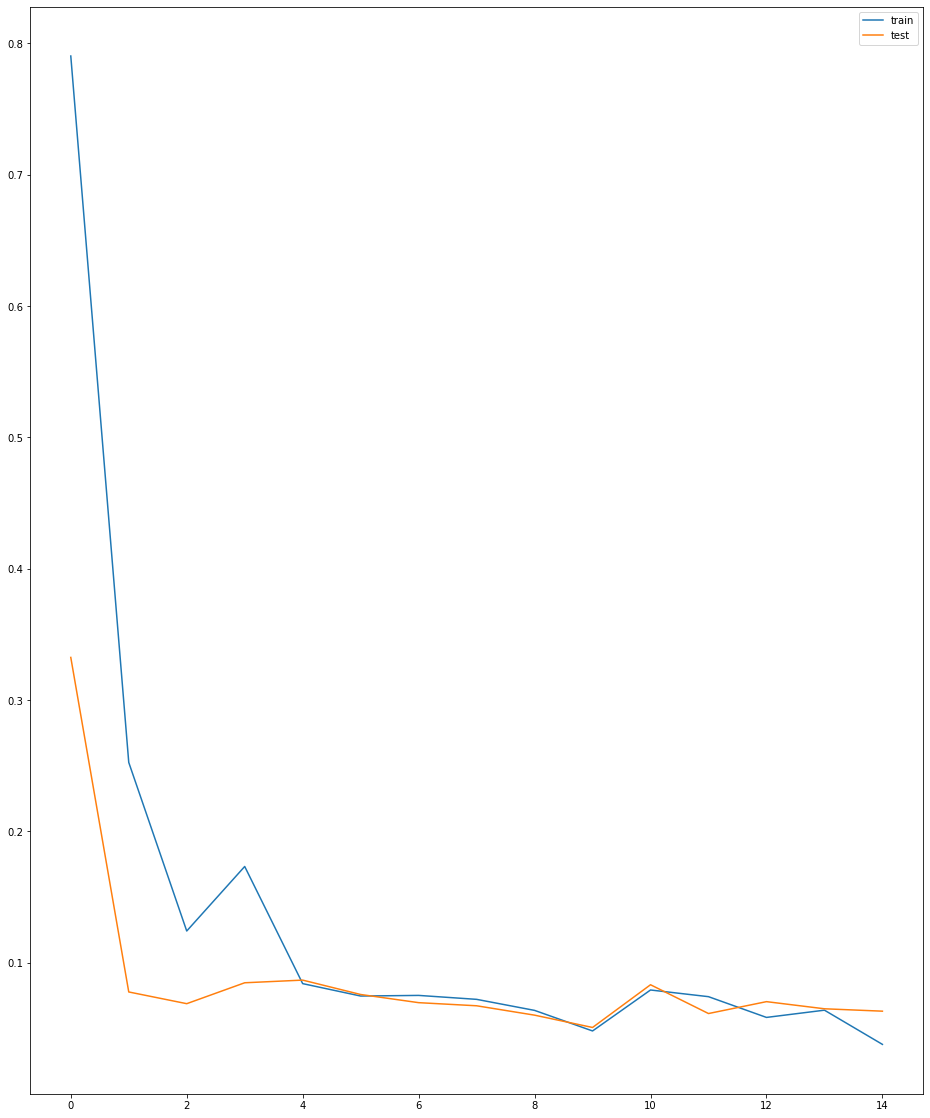

In [ ]:
# Using callbacks to enable Early Stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model2 = create_model_v2_generic()
history = model2.fit(x, y, batch_size=64, epochs=25, validation_split=0.2, callbacks=[es_callback])

# Diagnostics
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               5760100   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

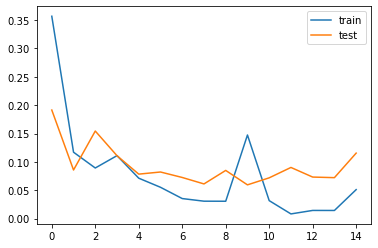

In [ ]:
# Using callbacks to enable Early Stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Construct model1
model1 = create_model_v1_generic()
history = model1.fit(x, y, batch_size=16, epochs=25, validation_split=0.2, callbacks=[es_callback])

# Diagnostics
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Save Model
if not os.path.exists('models'):
    os.makedirs('models')

# BEWARE OF OVERWRITING
# model1.save('./models/model1_v1_ACC97.h5')
# model2.save('./models/model2_v1_ACC98.h5')

## Testing

In [ ]:
# Test Directory
testdir = './test images'
os.listdir(testdir)

# Load Test Data
x_test = dir_crawler(directory=testdir, filetype=image_types, dataset=[])
print('x_test: {} images'.format(len(x_test)))

x_test: 22 images


### Preview Test Data

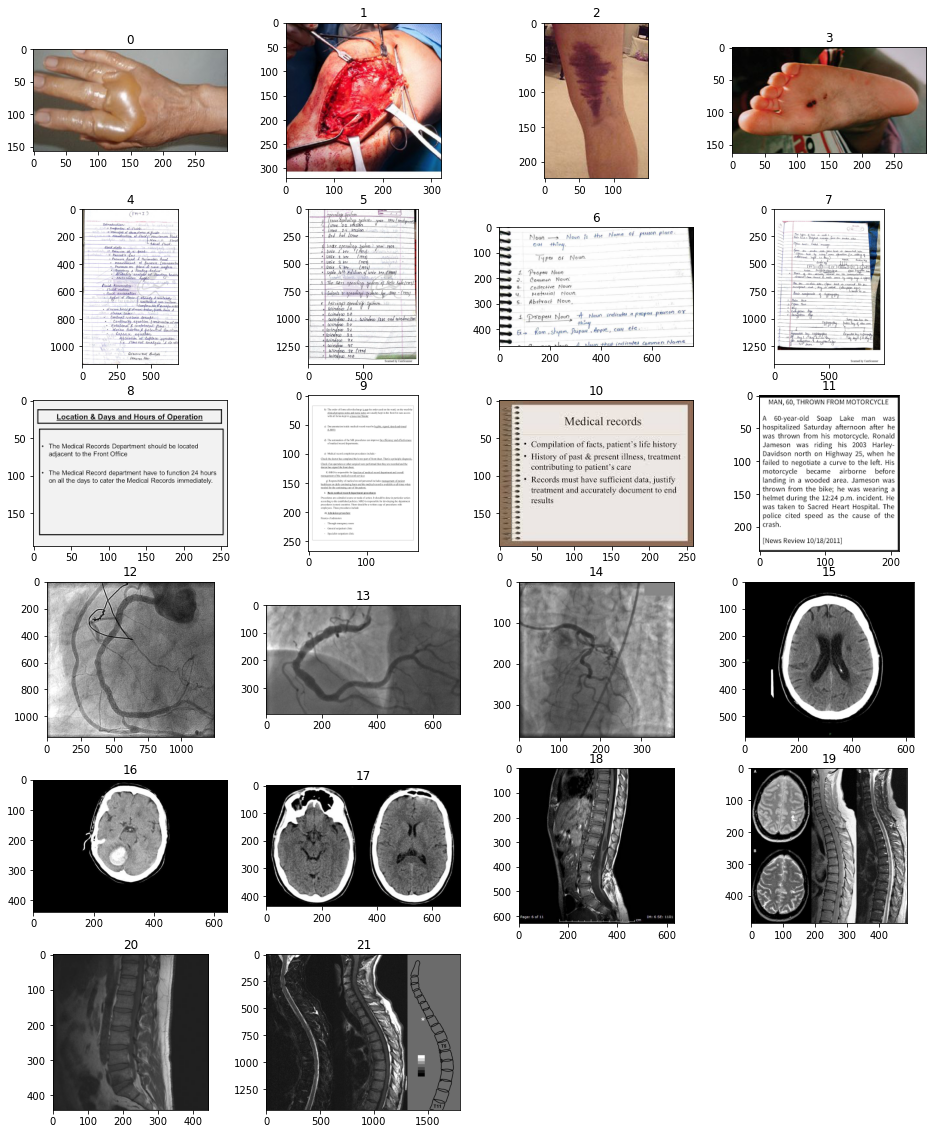

In [ ]:
plt.rcParams["figure.figsize"] = [16, 20]

# Preview Test Data
for index, item in enumerate(x_test):
    plt.subplot(6, 4, index+1)
    plt.imshow(item)
    plt.title(index)

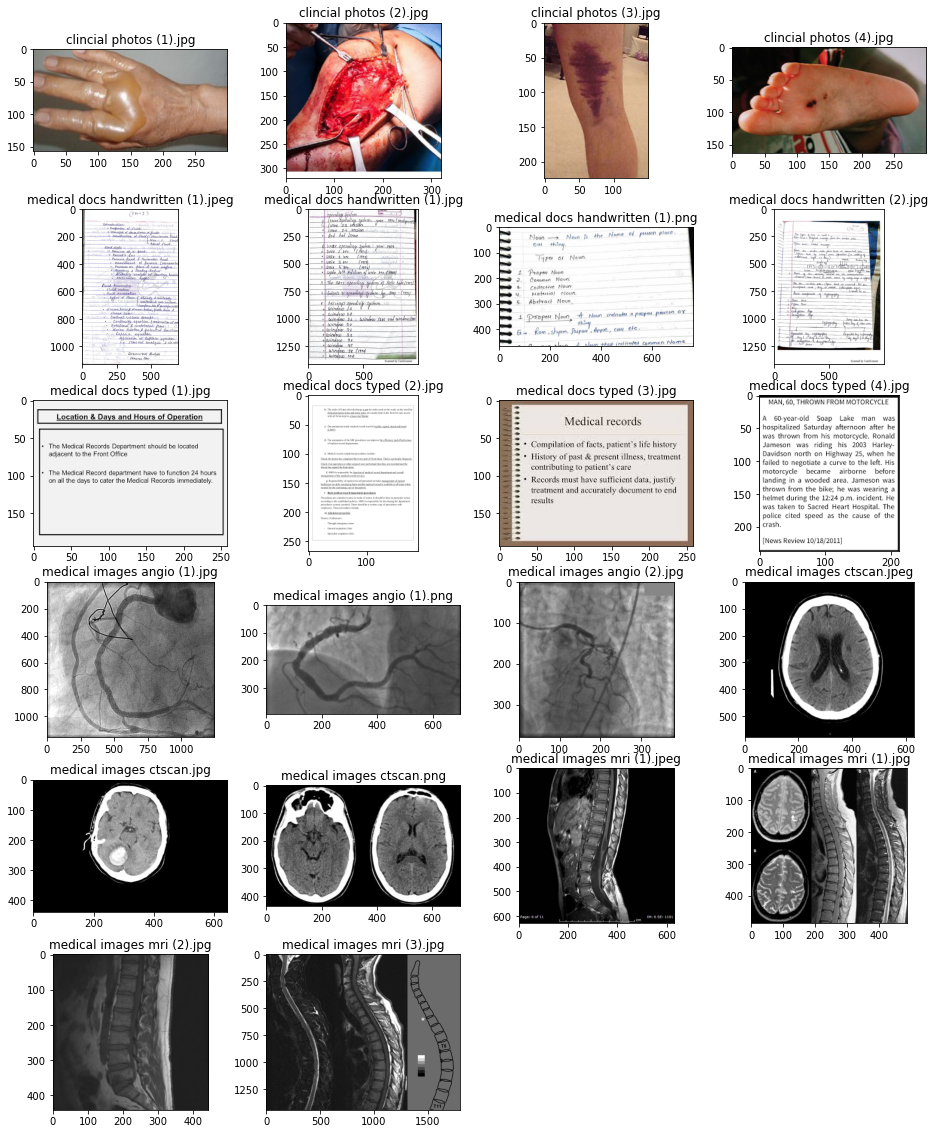

In [ ]:
# Preview Test Data
for index, item in enumerate(os.listdir(testdir)):
    newpath = os.path.join(testdir, item)
    plt.subplot(6, 4, index+1)
    plt.imshow(cv2.cvtColor(cv2.imread(newpath), cv2.COLOR_BGR2RGB))
    plt.title(item)

### Prepare Test Data

In [ ]:
# y labels were manually filled in
y_test = [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
test_data = []

# Zip x_test and y_test to test_data and pass to prepare_data function
if len(x_test)==len(y_test):
    for index, item in tqdm(enumerate(x_test)):
        test_data.append((item, y_test[index]))
    else:
        print('x_test and y_test are of unequal lengths')


x_test, y_test = prepare_data(test_data)

22it [00:00, 22197.42it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 3150.38it/s]

x_test and y_test are of unequal lengths
x: <class 'numpy.ndarray'> (22, 128, 128, 3)
y: <class 'numpy.ndarray'> (22, 3)


### Model Evaluation

In [ ]:
def evaluate_model(model):
    score, acc = model.evaluate(x_test, y_test, verbose=2)
    print('Val accuracy:', acc)

In [ ]:
evaluate_model(tf.keras.models.load_model('./models/model1_v1_ACC97.h5'))

22/22 - 0s - loss: 0.2100 - accuracy: 0.9091
Val accuracy: 0.90909094


In [ ]:
evaluate_model(model2)

22/22 - 0s - loss: 0.0018 - accuracy: 1.0000
Val accuracy: 1.0


# Predict

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [ ]:
def predict_class(path_image, model, image_size=128):

    # Load and Resize Image
    img = cv2.cvtColor(cv2.imread(path_image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    img_transformed = cv2.resize(img, (image_size, image_size), interpolation = cv2.INTER_CUBIC)

    # Convert to numpy array and float32
    img_transformed = np.array(img_transformed).reshape(-1, image_size, image_size, 3)

    # Normalise the array
    img_transformed = img_transformed/255.0

    # Predict Class of Image
    prediction_array = model.predict(img_transformed)

    # Output the Prediction Array as Class Name
    prediction_array = np.reshape(prediction_array, -1)
    prediction_array_index = np.where(prediction_array == np.amax(prediction_array))

    if prediction_array_index[0] == 0:
        prediction_class = 'Image Type: Medical Image'
    elif prediction_array_index[0] == 1:
        prediction_class = 'Image Type: Medical Document'
    elif prediction_array_index[0] == 2:
        prediction_class = 'Image Type: Clincial Photo'

    plt.imshow(img)
#     plt.title(prediction_class)
    plt.show()

    print(prediction_class)


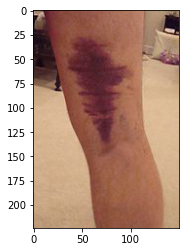

Image Type: Clincial Photo


In [ ]:
path_clin_photo = r"..\01 Image Type Classification\test images\clincial photos (3).jpg"
path_med_doc    = r"..\01 Image Type Classification\test images\medical docs typed (2).jpg"
path_med_img    = r"..\01 Image Type Classification\test images\medical images mri (2).jpg"


predict_class(path_image = path_clin_photo,
              model = tf.keras.models.load_model('./models/model1_v1_ACC97.h5'))

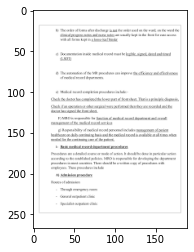

Image Type: Medical Document


In [ ]:
path_clin_photo = r"..\01 Image Type Classification\test images\clincial photos (3).jpg"
path_med_doc    = r"..\01 Image Type Classification\test images\medical docs typed (2).jpg"
path_med_img    = r"..\01 Image Type Classification\test images\medical images mri (2).jpg"


predict_class(path_image = path_med_doc,
              model = tf.keras.models.load_model('./models/model1_v1_ACC97.h5'))

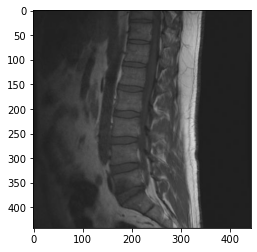

Image Type: Medical Image


In [ ]:
path_clin_photo = r"..\01 Image Type Classification\test images\clincial photos (3).jpg"
path_med_doc    = r"..\01 Image Type Classification\test images\medical docs typed (2).jpg"
path_med_img    = r"..\01 Image Type Classification\test images\medical images mri (2).jpg"


predict_class(path_image = path_med_img,
              model = tf.keras.models.load_model('./models/model1_v1_ACC97.h5'))